<div class="alert alert-block alert-info" style="border-radius: 15px; padding: 15px; border: 1px solid #cce5ff; background-color: #cce5ff;">
    <h1 style="text-align: center; color: #333";>*Customer Behavior  Analysis*</h1>
</div>

In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori , association_rules

In [12]:
# load the data
data = pd.read_csv("GroceryStoreDataSet.csv")
data

,"MILK,BREAD,BISCUIT"
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"
5,"MAGGI,TEA,CORNFLAKES"
6,"MAGGI,BREAD,TEA,BISCUIT"
7,"JAM,MAGGI,BREAD,TEA"
8,"BREAD,MILK"
9,"COFFEE,COCK,BISCUIT,CORNFLAKES"


<div class="alert alert-block alert-info" style="border-radius: 15px; padding: 15px; border: 1px solid #d9edf7; background-color: #cce5ff;">
    <h2 id="data-preparation" style="text-align: center; color: #333;">Step 2: Data Quality  </h2>
</div>

In [17]:
# Check missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   MILK,BREAD,BISCUIT  19 non-null     object
dtypes: object(1)
memory usage: 284.0+ bytes


In [18]:
# check null values
data.isna().sum().sort_values(ascending=False)

MILK,BREAD,BISCUIT    0
dtype: int64

<div class="alert alert-block alert-info" style="border-radius: 15px; padding: 15px; border: 1px solid #d9edf7; background-color: #cce5ff;">
    <h2 id="data-preparation" style="text-align: center; color: #333;">Step 2: Prep the Data</h2>
</div>

In [20]:
data.shape

(19, 1)

In [22]:
# Split the items in each transaction
transactions = data["MILK,BREAD,BISCUIT"].apply(lambda x:x.split(","))

# Convert the transactions into a list of lists
transactions = list(transactions)
print(transactions)

[['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'], ['BREAD', 'TEA', 'BOURNVITA'], ['JAM', 'MAGGI', 'BREAD', 'MILK'], ['MAGGI', 'TEA', 'BISCUIT'], ['BREAD', 'TEA', 'BOURNVITA'], ['MAGGI', 'TEA', 'CORNFLAKES'], ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'], ['JAM', 'MAGGI', 'BREAD', 'TEA'], ['BREAD', 'MILK'], ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'], ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'], ['COFFEE', 'SUGER', 'BOURNVITA'], ['BREAD', 'COFFEE', 'COCK'], ['BREAD', 'SUGER', 'BISCUIT'], ['COFFEE', 'SUGER', 'CORNFLAKES'], ['BREAD', 'SUGER', 'BOURNVITA'], ['BREAD', 'COFFEE', 'SUGER'], ['BREAD', 'COFFEE', 'SUGER'], ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]


In [27]:
# Transform the list of transactions into a one-hot encoded DataFrame
from mlxtend.preprocessing import TransactionEncoder
encoder = TransactionEncoder()
data_encoded = encoder.fit_transform(transactions)
data_encoded
# convert it into a dataframe
data = pd.DataFrame(data=data_encoded,columns=encoder.columns_,dtype=int)
data

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1,0,1,0,0,1,0,0,1,0,0
1,0,1,1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,1,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,1
4,0,1,1,0,0,0,0,0,0,0,1
5,0,0,0,0,0,1,0,1,0,0,1
6,1,0,1,0,0,0,0,1,0,0,1
7,0,0,1,0,0,0,1,1,0,0,1
8,0,0,1,0,0,0,0,0,1,0,0
9,1,0,0,1,1,1,0,0,0,0,0


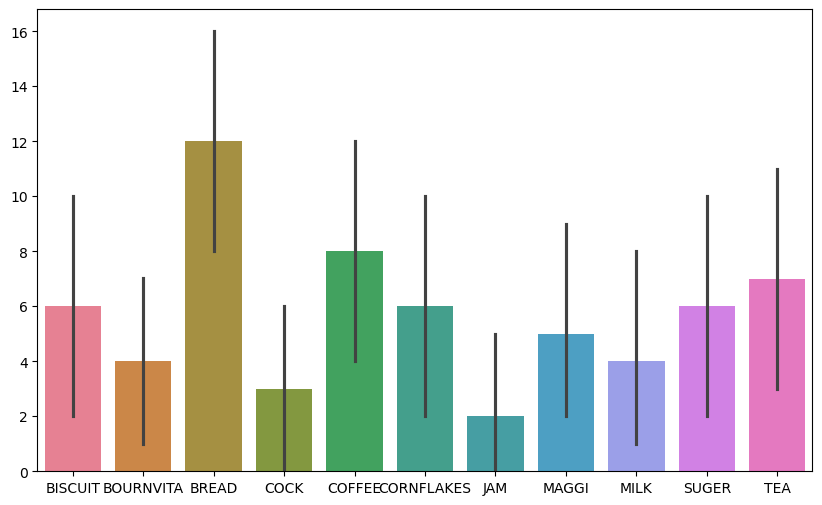

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(data, estimator=sum)
plt.show()

<div class="alert alert-block alert-info" style="border-radius: 15px; padding: 15px; border: 1px solid #d9edf7; background-color: #cce5ff;">
    <h2 style="text-align: center; color: #333;">Concept</h2>
    <p style="color: #333;">The Apriori Algorithm is like a treasure hunter looking for hidden patterns in customer purchase data. It helps find associations between items, identifying combinations of products that frequently appear together in transactions. This insight allows the store to make smart recommendations and optimize product placements.</p>
</div>

<div class="alert alert-block alert-info" style="border-radius: 15px; padding: 15px; border: 1px solid #d9edf7; background-color: #cce5ff;">
    <h3 style="text-align: center; color: #333;">Working and Steps for Apriori Algorithm</h3>
    <p style="color: #333;">Ada, the brilliant engineer, broke down the working of the Apriori Algorithm into clear steps for Mr. Data:</p>
    
<p style="color: #333;">1. Identify Frequent Items (Support):</p>

<p style="color: #333;">Support is the proportion of transactions in which an item appears. It helps find out how popular an item is.</p>

<p style="color: #333;">For example, if croissants appear in 30 out of 100 transactions, the support for croissants is 0.30.</p>
<p style="color: #333;">2. Generate Candidate Itemsets:</p>

<p style="color: #333;">Start with single items and find frequent pairs, triplets, etc., that meet a minimum support threshold.</p>
        
<p style="color: #333;">If croissants and coffee appear together in 20 transactions out of 100, the support for the pair (croissants, coffee) is 0.20.</p>
<p style="color: #333;">3. Prune Infrequent Itemsets:</p>

<p style="color: #333;">Remove itemsets that do not meet the minimum support threshold.</p>
        
<p style="color: #333;">If a pair or a triplet of items appears together in less than, say, 5% of transactions, it is pruned.</p>
</div>

In [30]:
# Apply the Apriori algorithm
from mlxtend.frequent_patterns import apriori , association_rules
frequent_items = apriori(data,min_support=0.01,use_colnames=True)
frequent_items

,support,itemsets
0,0.315789,(BISCUIT)
1,0.210526,(BOURNVITA)
2,0.631579,(BREAD)
3,0.157895,(COCK)
4,0.421053,(COFFEE)
...,...,...
78,0.052632,"(MAGGI, TEA, BISCUIT, BREAD)"
79,0.105263,"(BISCUIT, COCK, CORNFLAKES, COFFEE)"
80,0.052632,"(JAM, MILK, BREAD, MAGGI)"
81,0.052632,"(JAM, TEA, MAGGI, BREAD)"


<div class="alert alert-block alert-info" style="border-radius: 15px; padding: 15px; border: 1px solid #d9edf7; background-color: #cce5ff;">
    <p style="color: #333;">
        4. Generate Association Rules:</p>

<p style="color: #333;">From the frequent itemsets, create rules that suggest buying one item leads to buying another.
For example, the rule could be: "If a customer buys croissants, they are likely to buy coffee."</p>
</div>

In [31]:
# Generate association rules
rules = association_rules(frequent_items,metric="confidence",min_threshold=0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BISCUIT),(BREAD),0.315789,0.631579,0.157895,0.500000,0.791667,-0.041551,0.736842,-0.277778
1,(BREAD),(BISCUIT),0.631579,0.315789,0.157895,0.250000,0.791667,-0.041551,0.912281,-0.416667
2,(BISCUIT),(COCK),0.315789,0.157895,0.105263,0.333333,2.111111,0.055402,1.263158,0.769231
3,(COCK),(BISCUIT),0.157895,0.315789,0.105263,0.666667,2.111111,0.055402,2.052632,0.625000
4,(BISCUIT),(COFFEE),0.315789,0.421053,0.105263,0.333333,0.791667,-0.027701,0.868421,-0.277778
...,...,...,...,...,...,...,...,...,...,...
257,"(TEA, COFFEE)","(MILK, CORNFLAKES)",0.052632,0.105263,0.052632,1.000000,9.500000,0.047091,inf,0.944444
258,"(MILK, CORNFLAKES)","(TEA, COFFEE)",0.105263,0.052632,0.052632,0.500000,9.500000,0.047091,1.894737,1.000000
259,"(MILK, COFFEE)","(TEA, CORNFLAKES)",0.052632,0.105263,0.052632,1.000000,9.500000,0.047091,inf,0.944444
260,"(CORNFLAKES, COFFEE)","(TEA, MILK)",0.210526,0.052632,0.052632,0.250000,4.750000,0.041551,1.263158,1.000000


<div class="alert alert-block alert-info" style="border-radius: 15px; padding: 15px; border: 1px solid #d9edf7; background-color: #cce5ff;">
    <h2 id="analysis" style="text-align: center; color: #333;">Step 4: Analyze the Results</h2>
</div>

<div class="alert alert-block alert-info" style="border-radius: 15px; padding: 15px; border: 1px solid #d9edf7; background-color: #cce5ff;">
    <h2 style="text-align: center; color: #333;">* Metrics *</h2>
    <p style="color: #333;">Ada explained the key metrics used to evaluate the rules:</p>

<p style="color: #333;">1. Support:</p>

<p style="color: #333;">The proportion of transactions in which the itemset appears.</p>

<p style="color: #333;">Support(𝐴) = Number of transactions containing A / Total number of transactions</p>

<p style="color: #333;">2. Confidence:</p>

<p style="color: #333;">The likelihood that a rule is true for new transactions.</p>

<p style="color: #333;">Confidence(𝐴→𝐵) = Support(𝐴∩𝐵) / Support(𝐴)</p>
 
<p style="color: #333;">3. Leverage:</p>

<p style="color: #333;">Measures the difference between the observed frequency of the itemset and the frequency expected if items were independent.</p>

<p style="color: #333;">Leverage(𝐴→𝐵) = Support(𝐴∩𝐵) − (Support(𝐴)×Support(𝐵))</p>
        
<p style="color: #333;">4. Lift:</p>

<p style="color: #333;">Indicates how much more likely items A and B are to be bought together than if they were independent.</p>

<p style="color: #333;">Lift(𝐴→𝐵) = Support(𝐴∩𝐵) / (Support(𝐴)×Support(𝐵))</p>

<p style="color: #333;">5. Conviction:</p>

<p style="color: #333;">Measures the effect of the rule's predictive power and is inversely related to the likelihood of the consequent occurring without the antecedent.</p>

<p style="color: #333;">Conviction(𝐴) = (1−Support(𝐵)) / (1−Confidence(𝐴→𝐵))</p>
</div>

In [35]:
# Sort rules by lift
rules = rules.sort_values(by='lift', ascending=False)

# Display top 10 rules
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
194,"(MILK, BISCUIT)","(BREAD, CORNFLAKES)",0.052632,0.052632,0.052632,1.0,19.0,0.049861,inf,1.000000
199,"(BREAD, CORNFLAKES)","(MILK, BISCUIT)",0.052632,0.052632,0.052632,1.0,19.0,0.049861,inf,1.000000
182,(JAM),"(MAGGI, MILK)",0.105263,0.052632,0.052632,0.5,9.5,0.047091,1.894737,1.000000
231,"(JAM, BREAD)","(MAGGI, MILK)",0.105263,0.052632,0.052632,0.5,9.5,0.047091,1.894737,1.000000
234,"(MAGGI, MILK)","(JAM, BREAD)",0.052632,0.105263,0.052632,1.0,9.5,0.047091,inf,0.944444


<div class="alert alert-block alert-info" style="border-radius: 15px; padding: 15px; border: 1px solid #d9edf7; background-color: #cce5ff;">
    <h1 style="text-align: center; color: #333;">* Advantages and Disadvantages *</h1>
    <p style="color: #333;">
Ada also highlighted the advantages and disadvantages of using the Apriori Algorithm:</p>

<p style="color: #333;">Advantages:</p>
        
<p style="color: #333;">-> Simplicity: Easy to understand and implement.</p>
       
<p style="color: #333;">-> Wide Applicability: Can be applied to various domains like retail, online recommendations, and more.</p>

<p style="color: #333;">->Interpretability: The rules generated are easy to interpret and act upon.</p>

<p style="color: #333;">Disadvantages:</p>

<p style="color: #333;">-> Computationally Expensive: Can be slow for large datasets due to multiple scans of the database.</p>
        
<p style="color: #333;">-> High Memory Usage: Requires significant memory to store candidate itemsets.</p>

<p style="color: #333;">-> Minimum Support Limitation: Setting the minimum support threshold too high might miss interesting patterns, while setting it too low might generate too many insignificant rules.</p>